In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
import scipy.stats as st

* Lecture du Data frame

In [2]:
transaction_df = pd.read_csv('transaction_final.csv')

* Decouverte des 5 premières lignes 

In [3]:
transaction_df.head()

,date,id_prod,session_id,client_id,price,categ,sex,birth,age,year,month
0,2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,f,1967,54,2021,3
1,2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,m,1960,61,2021,3
2,2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,m,1988,33,2021,3
3,2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,f,1989,32,2021,3
4,2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,f,1956,65,2021,3


* Vérification de la taille du data frame 

In [4]:
transaction_df.shape

(679332, 11)

* Vérification des types de données 

In [5]:
transaction_df.dtypes

date           object
id_prod        object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth           int64
age             int64
year            int64
month           int64
dtype: object

* Vérification des valeurs manquantes 

In [6]:
transaction_df.isnull().sum().sum()

0

* Date indexing 

In [7]:
transaction_df['date'] = pd.to_datetime(transaction_df['date'])

In [8]:
transaction_df.dtypes

date          datetime64[ns]
id_prod               object
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth                  int64
age                    int64
year                   int64
month                  int64
dtype: object

In [9]:
transaction_df = transaction_df.set_index('date')

In [10]:
 transaction_df.sort_index(inplace=True)

In [11]:
transaction_df.head()

,id_prod,session_id,client_id,price,categ,sex,birth,age,year,month
date,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,f,1967,54,2021,3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,m,1960,61,2021,3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,m,1988,33,2021,3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,f,1989,32,2021,3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,f,1956,65,2021,3


# Analyse Univariée et Bivariée

## Le Chiffre d'Affaires (CA)

Pour analyser les performances commerciales nous allons définir une périodicité. Ainsi donc la première année sera de 2021-03 à 2022-02 et la deuxième année sera de 2022-03 à 2023-02.

* Calcul du CA de de la première année: de 2021-03 au 2022-02 (CA_an1)

In [12]:
CA_an1 = transaction_df.loc['2021-03':'2022-02', 'price'].sum()

In [13]:
print(f'Le chiffre d\'affaire de la première année est de:{CA_an1.round(3)} EURO')

Le chiffre d'affaire de la première année est de:5832832.798 EURO


* Calcul du CA de la deuxième année: de 2022-03 au 2023-02 (CA_an2)

In [14]:
CA_an2 = transaction_df.loc['2022-03':'2023-02', 'price'].sum()

In [15]:
print(f'Le chiffre d\'affaire de la première année est de:{CA_an2.round(3)} EURO')

Le chiffre d'affaire de la première année est de:6023246.953 EURO


* Calcul de la variation du CA

In [16]:
variation_CA = ((CA_an2 - CA_an1) / CA_an1) * 100

In [17]:
variation_CA.round(2)

3.26

**Conclusion:** Le CA est en croissance de 3.26% par rapport à celui de la première année.

### Evolution du CA selon la fréquence temporelle 

* Calcul du CA par mois

In [18]:
transaction_df.loc['2021':'2023', 'price'].resample('M').sum().sort_values(ascending=False).reset_index()

,date,price
0,2022-02-28,535688.521627
1,2021-12-31,525991.748308
2,2022-01-31,525392.181648
3,2023-01-31,517615.018308
4,2022-05-31,517302.813275
5,2021-11-30,516274.113297
6,2022-03-31,515573.551627
7,2022-07-31,510910.779956
8,2022-12-31,510283.329978
9,2022-10-31,508024.153297


* Visualisation de l'évolution du CA par mois, par semaine et par jour

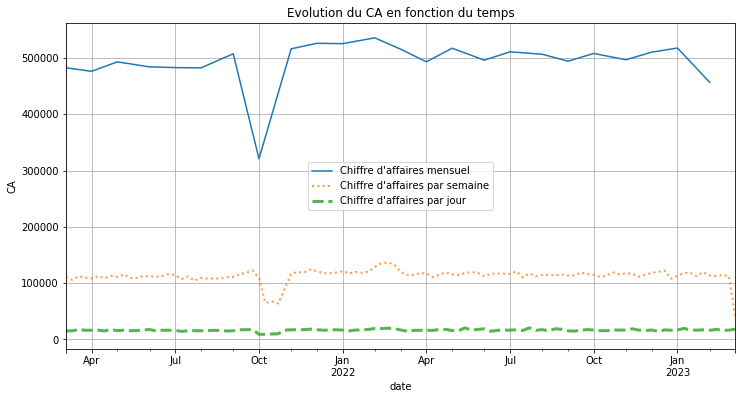

In [19]:
plt.figure(figsize=(12,6))
transaction_df.loc['2021':'2023', 'price'].resample('M').sum().plot(kind='line', label='Chiffre d\'affaires mensuel',style='-o', grid=True)
transaction_df.loc['2021':'2023', 'price'].resample('W').sum().plot(kind='line', label='Chiffre d\'affaires par semaine', lw=2, ls=':', alpha=0.8, grid=True)
transaction_df.loc['2021':'2023', 'price'].resample('D').sum().plot(kind='line', label='Chiffre d\'affaires par jour', lw=3, ls='--', alpha=0.8, grid=True)
plt.ylabel('CA')
plt.title('Evolution du CA en fonction du temps')
plt.legend(loc='center')
plt.show()

**Conclusion**
- De manière général le CA subit une fluctuation.
- Le CA chute brusquement dans le mois d'**octobre 2021** passant de 516274 EURO à 320873 EURO puis augmente à partir de novembre 2021. Cette baisse du CA est probablement due à un bug ou à des ventes qui n'ont pas été enregistrées (voir les 21 produits non vendus identifiés pendant le data procesing). 
- Le mois de **fervier 2022** a enregistré le **CA le plus élévé** par contre celui d'**Octobre 2021** a enregistré le **CA le plus bas**.

### Evolution du CA moyen par mois (CA_moyen_mois)

* Calcul du CA moyen par mois

In [20]:
CA_moyen_mensuel = transaction_df.loc['2021':'2023', 'price'].resample('M').mean().round(3)

In [21]:
CA_moyen_mensuel.reset_index().sort_values(by='price', ascending=False)

,date,price
4,2021-07-31,19.517
5,2021-08-31,18.800
8,2021-11-30,18.229
11,2022-02-28,18.095
3,2021-06-30,18.027
10,2022-01-31,17.902
22,2023-01-31,17.883
23,2023-02-28,17.875
13,2022-04-30,17.857
21,2022-12-31,17.826


* Visualisation 

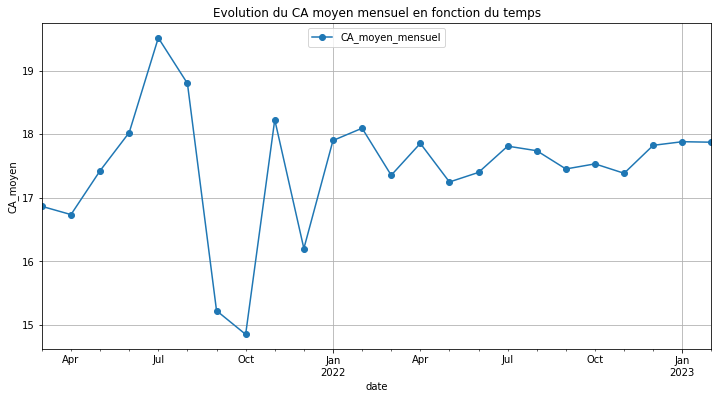

In [22]:
plt.figure(figsize=(12,6))
CA_moyen_mensuel.plot(kind='line', label='CA_moyen_mensuel',style='-o', grid=True)
plt.ylabel('CA_moyen')
plt.title('Evolution du CA moyen mensuel en fonction du temps')
plt.legend(loc='upper center')
plt.show()

Le CA_moyen_mensuel est généralement compris entre 17 et 18 EURO. Le CA_moyen_mensuel le plus élévé est celui du mois de juillet 2021 et le plus bas est celui du mois d'octobre 2021.

* Evolution du CA moyen par mois, par semaine et par jour

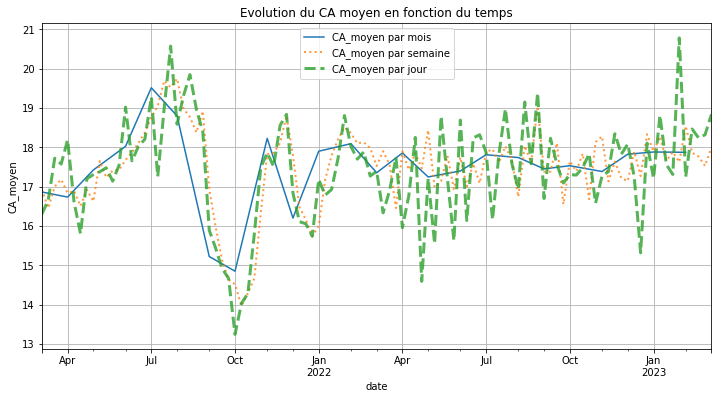

In [23]:
plt.figure(figsize=(12,6))
transaction_df.loc['2021':'2023', 'price'].resample('M').mean().plot(kind='line', label='CA_moyen par mois',style='-o', grid=True)
transaction_df.loc['2021':'2023', 'price'].resample('W').mean().plot(kind='line', label='CA_moyen par semaine', lw=2, ls=':', alpha=0.8, grid=True)
transaction_df.loc['2021':'2023', 'price'].resample('D').mean().plot(kind='line', label='CA_moyen par jour', lw=3, ls='--', alpha=0.8, grid=True)
plt.ylabel('CA_moyen')
plt.title('Evolution du CA moyen en fonction du temps')
plt.legend(loc='upper center')
plt.show()

**Conclusion:**
- De manière générale le CA_moyen fluctue entre 17 et 18 EURO
- Le mois de **juillet 2021** a enregistré le **CA_moyen_mensuel le plus élévé** (au dessus de 19 EURO) contrairement au mois **d'octobre 2021** le **CA_moyen_mensuel le plus bas(en dessous de 15 EURO)**. 
- Le mois de **Janvier 2023** enregistre le **CA_moyen journalier le plus élévé (21 EURO)**. 

## Analyse des KPI autour du CA

Les KPI autour du CA permettent d'analyser les performances commerciales. 

### Le nombre de commandes 

* Calcul du nombre de commandes de la première année: de 2021-03 au 2022-02

In [24]:
nb_command_an1 = transaction_df.loc['2021-03':'2022-02', 'session_id'].nunique()

In [25]:
print(f"Le nombre de commandes de la première année est de: {nb_command_an1}")

Le nombre de commandes de la première année est de: 169194


* Calcul du nombre de commande de la deuxième année: de 2022-03 au 2023-02

In [26]:
nb_command_an2 = transaction_df.loc['2022-03':'2023-02', 'session_id'].nunique()

In [27]:
print(f"Le nombre de commande de la deuxième année est de: {nb_command_an2}")

Le nombre de commande de la deuxième année est de: 173121


* Le pourcentage d'evolution du nombre de commandes

In [28]:
Evolution_nb_command = ((nb_command_an2-nb_command_an1)/nb_command_an1)*100

In [29]:
Evolution_nb_command

2.3210042909323025

**Conclusion**: Le nombre de commandes **a augmenté de 2.3%** de la première année à la deuxième année

### Le nombre d'articles vendus

* Le nombre d'articles par an 

In [30]:
nb_art_an1 = transaction_df.loc['2021-03':'2022-02', 'id_prod'].count()

In [31]:
print(f"Le nombre d'articles vendus de la première année est de:{nb_art_an1}")

Le nombre d'articles vendus de la première année est de:337288


In [32]:
nb_art_an2 = transaction_df.loc['2022-03':'2023-02', 'id_prod'].count()

In [33]:
print(f"Le nombre d'articles vendus de la deuxième année est de:{nb_art_an2}")

Le nombre d'articles vendus de la deuxième année est de:342044


* Le pourcentage d'évolution du nombre d'articles vendus

In [34]:
evolution_nb_article = ((nb_art_an2 - nb_art_an1) / nb_art_an1)*100

In [35]:
evolution_nb_article

1.4100709186214748

**Conclusion:** Le nombre d'articles vendus **a augmenté de plus de 1.4%** de la première année à la deuxième année.

### Le nombre de sessions

* Le nombre de sessions par an

In [36]:
nb_session_an1 = transaction_df.loc['2021-03':'2022-02', 'session_id'].nunique()

In [37]:
print(f"Le nombre de session de la première année est de:{nb_session_an1}")

Le nombre de session de la première année est de:169194


In [38]:
nb_session_an2 = transaction_df.loc['2022-03':'2023-02', 'session_id'].nunique()

In [39]:
print(f"Le nombre de session de la deuxième année est de:{nb_session_an2}")

Le nombre de session de la deuxième année est de:173121


* Le pourcentage d'evolution du nombre de sessions

In [40]:
evolution_session = ((nb_session_an2 - nb_session_an1) / nb_session_an1)*100

In [41]:
evolution_session

2.3210042909323025

**Conclusion:** Le nombre de sessions **a augmenté de 2.32%** par rapport à la première année.

### Calcul de l'indice de vente (IDV) 

L’Indice de Vente (IDV) est un indicateur qui mesure le nombre moyen d’articles achetés lors d’une transaction.

C’est le nombre de produits contenus en moyenne dans une commande sur un e-shop. Il est intéressant à surveiller car c’est un moyen de valoriser le Panier Moyen et d’augmenter votre Chiffre d’Affaires.
sa formule est la suivante:

**Indice De Vente = Nombre d’articles vendus / Nombre de Commandes**

* Calcul de l'IDV par an

In [42]:
IDV_an1 = nb_art_an1 / nb_command_an1

In [43]:
IDV_an1.round(1)

2.0

In [44]:
IDV_an2 = nb_art_an2 / nb_command_an2

In [45]:
IDV_an2.round(1)

2.0

**Conclusion:** En moyenne, les clients achètent 2 articles par session sur la période d'un an.

### Les flops et les top des références des produits vendus 

In [46]:
print(f'Voici la liste des 5 top et flop des références des produits vendus')
transaction_df[['id_prod','price']].groupby(['id_prod']).count().sort_values(by='price', ascending=False)

Voici la liste des 5 top et flop des références des produits vendus


,price
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
...,...
0_1284,1
0_549,1
0_1498,1


**Conclusion**:
Les **5 top**  des références des produits vendus sont de la **catég_1**, par contre les **5 flop** sont de la **catego_O.**

### Repartition des prix des produits par catégorie

--------------------------------------------------
0.0
moy:
 10.638188127612253
med:
 9.99
mod:
 0    4.99
dtype: float64
var:
 24.32669270515606
ect;
 4.9322097182861215
skw:
 0.42247859770094814
kur:
 -0.3861652324758609


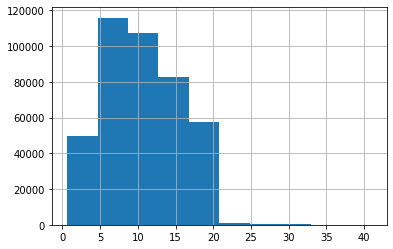

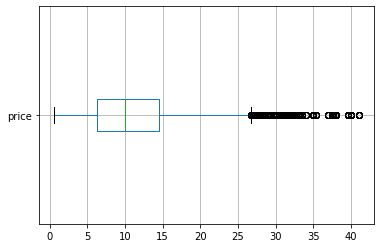

--------------------------------------------------
1.0
moy:
 20.4857295230179
med:
 19.08
mod:
 0    15.99
dtype: float64
var:
 57.53035707569349
ect;
 7.584876866218297
skw:
 1.734237258116213
kur:
 8.164115605848043


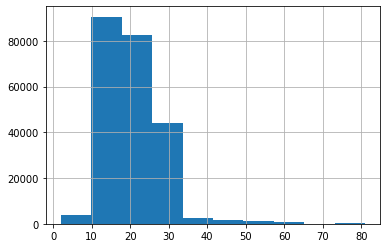

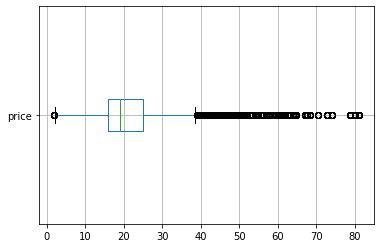

--------------------------------------------------
2.0
moy:
 76.20741221941681
med:
 62.83
mod:
 0    68.99
dtype: float64
var:
 1579.9408534984402
ect;
 39.74846982587431
skw:
 2.1835172974115067
kur:
 4.817061548670198


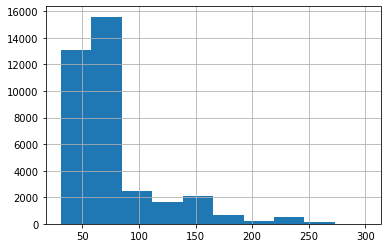

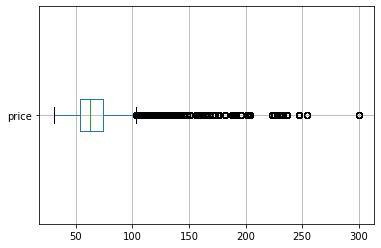

In [47]:
for cat in transaction_df['categ'].unique():
    subset = transaction_df[transaction_df['categ']==cat]
    print('-'*50)
    print(cat)
    print('moy:\n', subset['price'].mean())
    print('med:\n', subset['price'].median())
    print('mod:\n', subset['price'].mode())
    print('var:\n', subset['price'].var(ddof=0))
    print('ect;\n', subset['price'].std(ddof=0))
    print('skw:\n', subset['price'].skew())
    print('kur:\n', subset['price'].kurtosis())
    subset['price'].hist()
    plt.show()
    subset.boxplot(column='price', vert=False)
    plt.show()

**Analyse:**

**Les messures de tendance centrale:**
- Le mode de la catégorie est **0** car c'est la valeur la plus fréquente
- La moyenne et la médiane du CA les plus élévées sont celle de la **categ 2** par contre la catég 0 a la moyenne et la mediane les plus faibles. Donc la **catégorie 2 possède les prix des produits les plus élévés contrairement à la catégorie 0 qui possède des prix trés faibles**

**Les mesures de dispersion**
- La variance et l'écart type les plus élévées correspondent à celle de la catégorie 2, alors que les plus faibles sont celle de la catégorie 0. Donc **les prix au niveau de la catégorie 2 s'écartent beaucoup de la moyenne, alors que ceux de la catégorie 0 sont très serrés autour de la moyenne.**
- Produits de catég 0, la médiane est égale à la moyenne, donc la répartition des prix est symétrique donc suit une loi normale. Par contre les prix des catég 1 et 2 ont répartis de manière asymétrique. 

**Les mesures de forme**
- La categ 0 a un skewness qui tend à zéro, donc la répartition des prix est symétrique et un kustosis négatif donc les prix sont moins concentrés et la distribution est aplatie. Les catég 1 et 2 ont un skewness supérieur à zéro, cela confirme la répartition asymétrique des prix et une distribution étalée à droite.  

### Repartition du CA annuel par catégorie 

In [48]:
CA_annuel_par_categ = transaction_df[['year','categ','price']].groupby(['year','categ']).sum().reset_index()

In [49]:
CA_annuel_par_categ

,year,categ,price
0,2021,0.0,1.883946e+06
1,2021,1.0,1.777996e+06
2,2021,2.0,1.109810e+06
3,2022,0.0,2.194247e+06
4,2022,1.0,2.485275e+06
5,2022,2.0,1.430436e+06
6,2023,0.0,3.438890e+05
7,2023,1.0,3.904516e+05
8,2023,2.0,2.400286e+05


In [50]:
CA_annuel_par_categ.pivot(index='year', columns='categ', values='price')

categ,0.0,1.0,2.0
year,,,
2021,1.883946e+06,1.777996e+06,1109810.26
2022,2.194247e+06,2.485275e+06,1430436.16
2023,3.438890e+05,3.904516e+05,240028.60


* Visualisation 

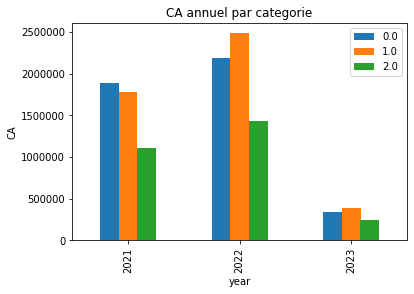

In [51]:
CA_annuel_par_categ.pivot(index='year', columns='categ', values='price').plot.bar()
plt.xlabel('year')
plt.ylabel('CA')
plt.title('CA annuel par categorie')
plt.legend(loc='upper right')
plt.show()

Le CA le plus élévé est celui des produits de la **catégorie 1.0 de l'année 2022** par contre le CA le plus bas est celui la catégorie 2.0 de l'année 2023. 

### Repartition du Chiffre d'affaires annuel par genre 

In [52]:
CA_annuel_par_genre = transaction_df[['year','sex','price']].groupby(['year','sex']).sum().reset_index()

In [53]:
CA_annuel_par_genre.sort_values(by='price', ascending=False)

,year,sex,price
3,2022,m,3.088256e+06
2,2022,f,3.021703e+06
1,2021,m,2.420242e+06
0,2021,f,2.351510e+06
4,2023,f,4.877147e+05
5,2023,m,4.866546e+05


In [54]:
CA_annuel_par_genre.pivot(index='year', columns='sex', values='price')

sex,f,m
year,,
2021,2.351510e+06,2.420242e+06
2022,3.021703e+06,3.088256e+06
2023,4.877147e+05,4.866546e+05


* Visualisation

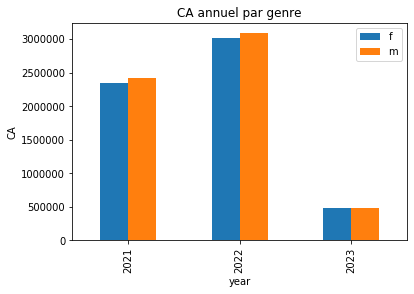

In [55]:
CA_annuel_par_genre.pivot(index='year', columns='sex', values='price').plot.bar()
plt.xlabel('year')
plt.ylabel('CA')
plt.title('CA annuel par genre')
plt.legend(loc='upper right')
plt.show()

**Conclusion:** 
- La repartition du CA annuel des clients au niveau du sexe est presque égalitaire chaque année. 
- Les clients ont effectué plus d'achat au cours de l'année 2022 et moins d'achats pendant l'année 2023.

### Profil des clients et repartition du chiffre d'affaires entre eux

#### Profil des clients en fonction de leur depense

In [56]:
print(f'Voici la liste du profil des 5 top et les flop des clients en fonction de leur dépense')
df_profil = transaction_df[['client_id', 'age','sex','price']].groupby(['client_id', 'sex','age']).sum().round(3).sort_values(by='price', ascending=False)
df_profil

Voici la liste du profil des 5 top et les flop des clients en fonction de leur dépense


,,,price
client_id,sex,age,
c_1609,m,41,324033.350
c_4958,m,22,289760.340
c_6714,f,53,153662.750
c_3454,m,52,113669.845
c_3263,f,36,5276.870
...,...,...,...
c_4648,m,17,11.200
c_240,m,23,11.060
c_8114,m,59,9.980


* VIsualisation

Text(0.5, 1.0, 'Profil des clients')

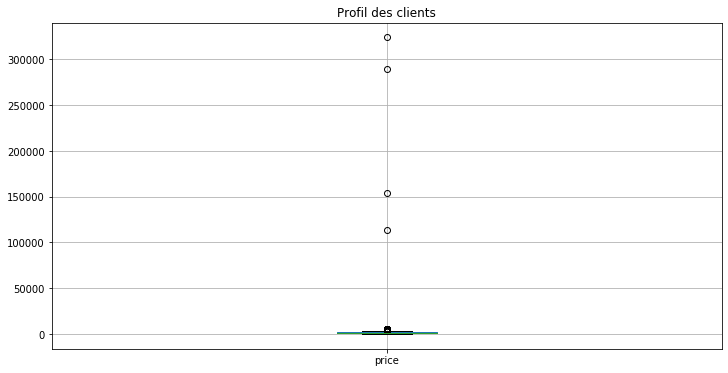

In [57]:
df_profil.boxplot(column='price', figsize=(12,6))
plt.title('Profil des clients')

**Conclusion:**
Les 4 premiers clients **c_1609, c_4958, c_6714 et c_3454** sur la liste ont un pouvoir d'achat très élévé par rapport aux autres clients.

#### Repartition du chiffre d'affaires entre eux

* Courbe de Lorenz

La courbe de Lorenz illustre la concentration des prix des produits au sein de la population clientèle.
En ordonnée nous avons le pourcentage cummulé des prix des produits et en abscisse la pourcentage cumulé des clients.
Plus la courbe séloigne de la bissectrice plus les inégalités sont fortes.

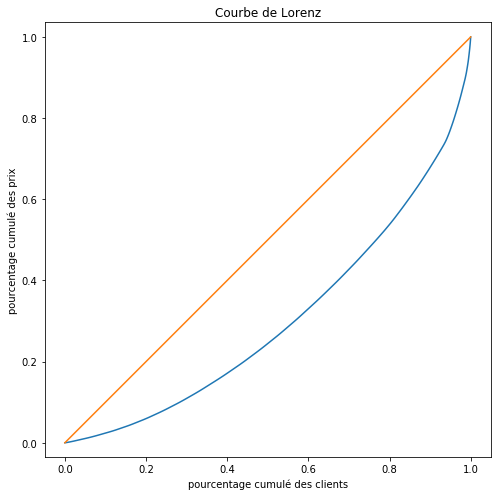

In [58]:
trans = transaction_df['price'].values
n = len(trans)
lorenz = np.cumsum(np.sort(trans)) / trans.sum()
lorenz = np.append([0], lorenz)

plt.figure(figsize=(8,8))
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n, 1+1/n,n+1)
plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.plot(lorenz, lorenz, drawstyle='steps-post')
plt.xlabel('pourcentage cumulé des clients')
plt.ylabel('pourcentage cumulé des prix')
plt.title('Courbe de Lorenz')
plt.show()

La courbe de Lorenz est éloignée de la première bissectrice donc les inégalités des clients au sein du CA cumulé sont fortes.

* L'indice de gini 

L'indice de gini mesure les inégalités clients au sein du CA cumulé. 
Il se calcule en rapportant l'aire du triangle formé par la bissectrice sur l'aire de la zone delimité par la courbe des prix des produits. Plus il est proche de 1, plus la repartition des clients est inégalitaire.
gini = 0 alors la repartition est égalitaire
gini > 0 alors la repartition est inégalitaire

In [59]:
AUC = (lorenz.sum()-lorenz[-1]/2 - lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
gini

0.3954386163239504

gini > 0, donc La repartition des clients au sein du CA cumulé est inégalitaire.

**Conclusion:** La répartition des clients au niveau du CA cumulé est inégalitaire

### Le montant du panier moyen (PM)

Le panier moyen (“average basket” ou “average order value” en anglais) correspond au montant dépensé par un client dans votre boutique physique ou en ligne. 
Le panier moyen peut être calculé sur un jour, une semaine, un mois voire un an. Il permet de comparer la performance de vos ventes. Comme la fréquentation, il s’agit d’un indicateur basique qui mesure l’évolution du chiffre d’affaires des différents points de vente et favorise ainsi les comparaisons de rentabilité entre ces derniers. Sa formule est la suivante:

**Panier moyen = Chiffre d’affaires généré / Nombre total de sessions uniques**

#### Calcul du montant Panier Moyen annuel

* Calcul du panier moyen par an (PM)

In [60]:
PM_an1 = CA_an1 / nb_command_an1

In [61]:
PM_an1.round(3)

34.474

In [62]:
PM_an2 = CA_an2 / nb_command_an2

In [63]:
PM_an2.round(3)

34.792

In [64]:
evolution_PM = ((PM_an2 - PM_an1)/ PM_an1)*100

In [65]:
evolution_PM.round(3)

0.922

**Conclusion**: Le PM a augmenté de **0.92%** par rapport à la première année.Donc le panier moyen n'a presque pas changé.

#### Calcul du panier moyen par session par mois

* Determinons le nombre de sessions uniques ou de paniers par mois 

In [66]:
nb_panier = transaction_df.loc['2021':'2023','session_id'].resample('M').nunique()

In [67]:
nb_panier.reset_index().sort_values(by='session_id', ascending=False)

,date,session_id
9,2021-12-31,15567
10,2022-01-31,14979
14,2022-05-31,14960
6,2021-09-30,14850
12,2022-03-31,14827
22,2023-01-31,14758
19,2022-10-31,14660
16,2022-07-31,14653
21,2022-12-31,14635
8,2021-11-30,14608


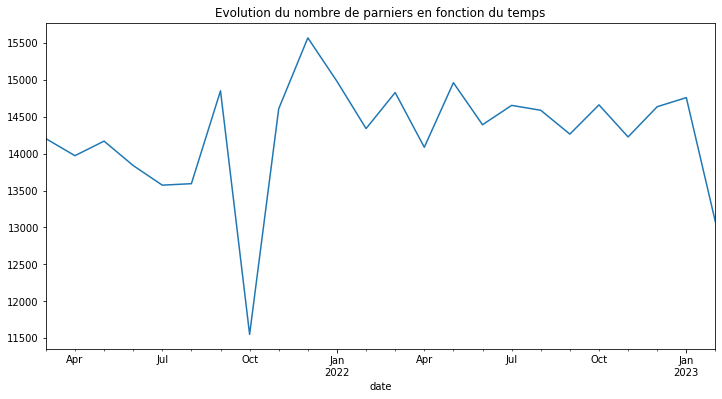

In [68]:
nb_panier.plot(figsize=(12,6))
plt.title('Evolution du nombre de parniers en fonction du temps')
plt.show()

* Le prix du panier par mois

In [69]:
price_panier = transaction_df.loc['2021':'2023','price'].resample('M').sum()

In [70]:
price_panier.reset_index().sort_values( by='price',ascending=True)

,date,price
7,2021-10-31,320873.208308
23,2023-02-28,456754.228308
1,2021-04-30,476258.236616
5,2021-08-31,482380.534967
0,2021-03-31,482536.354967
4,2021-07-31,482877.953319
3,2021-06-30,484163.028308
2,2021-05-31,493028.576637
13,2022-04-30,493147.876616
18,2022-09-30,494210.274967


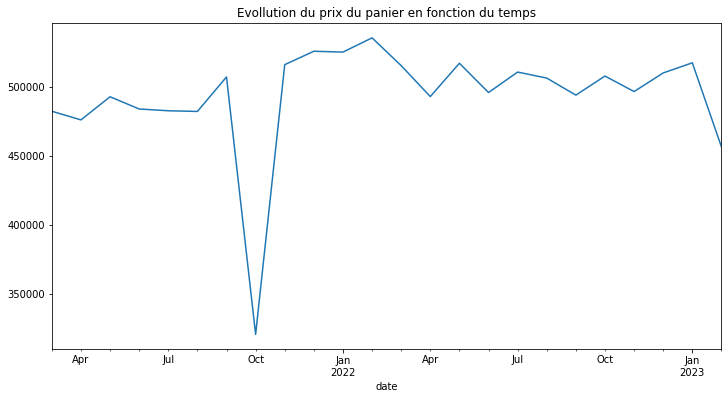

In [71]:
price_panier.plot(figsize=(12,6))
plt.title('Evollution du prix du panier en fonction du temps')
plt.show()

* Jointure

In [72]:
data = nb_panier.reset_index().merge(price_panier.reset_index(), on=['date'], how='inner')
data = data.set_index('date') 

* Calcul du panier moyen 

In [73]:
data['PM']  = (data['price'] / data['session_id']).round(3)

In [74]:
data.sort_values(by='PM',ascending=False)

,session_id,price,PM
date,,,
2022-02-28,14339,535688.521627,37.359
2021-07-31,13573,482877.953319,35.576
2021-08-31,13593,482380.534967,35.487
2021-11-30,14608,516274.113297,35.342
2022-01-31,14979,525392.181648,35.075
2023-01-31,14758,517615.018308,35.074
2022-04-30,14086,493147.876616,35.010
2021-06-30,13839,484163.028308,34.985
2023-02-28,13074,456754.228308,34.936


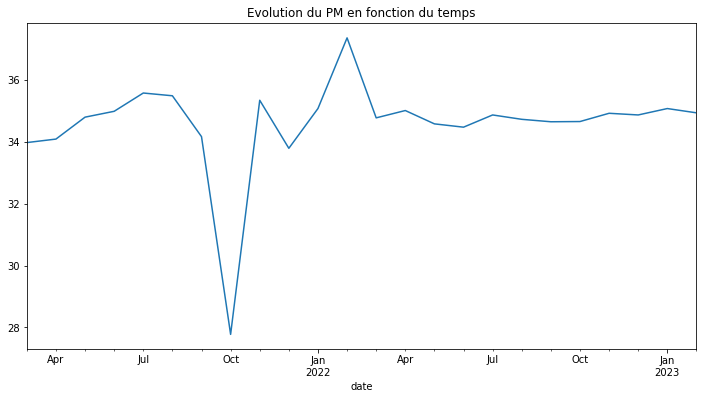

In [75]:
data['PM'].plot(figsize=(12,6))
plt.title('Evolution du PM en fonction du temps')
plt.show()

**Conclusion:** Le nombre de paniers a chuté brusquement dans le mois **d'otobre 2021**. Cela confirme que les ventes n'ont pas été enregistées ou à un bug pendant ce mois. Le mois de **fevrier 2022** a enregistré le nombre de panier le plus élévé.  

### Lien entre le CA et le nombre sessions

<Figure size 864x432 with 0 Axes>

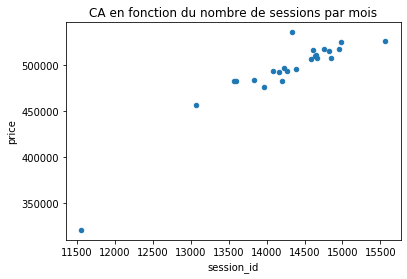

In [76]:
plt.figure(figsize=(12,6))
data.plot(kind='scatter', x='session_id',y='price')
plt.title('CA en fonction du nombre de sessions par mois')
plt.show()

**Conclusion:** Il ya une correlation linéaire entre le nombre de panier et le CA. Plus Le nombre de session augmente plus le PM augmente.

### Le nombre de ventes par session 

In [77]:
nb_vente_session = transaction_df[['id_prod','session_id']].groupby(['session_id']).count().reset_index().rename(columns={'id_prod':'nb_vente'})
print(f"Voici la liste du nombre de ventes par session")
nb_vente_session

Voici la liste du nombre de ventes par session


,session_id,nb_vente
0,s_1,1
1,s_10,1
2,s_100,2
3,s_1000,4
4,s_10000,3
...,...,...
342310,s_99994,3
342311,s_99995,1
342312,s_99996,4
342313,s_99997,1


### Le lien entre chiffre d'affaires et la durée de sessions 

#### Le CA par vente et par session 

* CA par session

In [78]:
CA_session = transaction_df[['session_id','price']].groupby(['session_id']).sum().reset_index().rename(columns={'price':'CA'})
CA_session.head()

,session_id,CA
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49


* Jointure

In [79]:
df_vente = nb_vente_session.merge(CA_session, on=['session_id'], how='inner')
df_vente.head()

,session_id,nb_vente,CA
0,s_1,1,11.99
1,s_10,1,26.99
2,s_100,2,33.72
3,s_1000,4,39.22
4,s_10000,3,41.49


#### Le temps mis par session

In [80]:
transaction_df2 = transaction_df.reset_index()
transaction_df2.dtypes

date          datetime64[ns]
id_prod               object
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth                  int64
age                    int64
year                   int64
month                  int64
dtype: object

In [81]:
df_session = transaction_df2.groupby(['session_id','client_id','age'])['date'].agg(['min','max']).rename(columns={'min':'start_date', 'max':'end_date'}).reset_index()

In [82]:
df_session.head()

,session_id,client_id,age,start_date,end_date
0,s_1,c_329,54,2021-03-01 00:01:07.843138,2021-03-01 00:01:07.843138
1,s_10,c_2218,51,2021-03-01 00:10:33.163037,2021-03-01 00:10:33.163037
2,s_100,c_3854,43,2021-03-01 04:12:43.572994,2021-03-01 04:43:58.025677
3,s_1000,c_1014,32,2021-03-03 02:38:09.568389,2021-03-03 03:25:12.320225
4,s_10000,c_476,32,2021-03-22 17:46:05.819130,2021-03-22 18:15:03.831240


In [83]:
df_session['duree'] = df_session['end_date'] - df_session['start_date']
df_session['duree'] = df_session['duree'].apply(lambda t: t.seconds/60)
df_session.head()

,session_id,client_id,age,start_date,end_date,duree
0,s_1,c_329,54,2021-03-01 00:01:07.843138,2021-03-01 00:01:07.843138,0.000000
1,s_10,c_2218,51,2021-03-01 00:10:33.163037,2021-03-01 00:10:33.163037,0.000000
2,s_100,c_3854,43,2021-03-01 04:12:43.572994,2021-03-01 04:43:58.025677,31.233333
3,s_1000,c_1014,32,2021-03-03 02:38:09.568389,2021-03-03 03:25:12.320225,47.033333
4,s_10000,c_476,32,2021-03-22 17:46:05.819130,2021-03-22 18:15:03.831240,28.966667


#### Nombre de ventes en fonction du temps passé sur le site

* Jointure

In [84]:
df_achat_minute = df_vente.merge(df_session, on='session_id', how='inner')
df_achat_minute.sort_values(by='duree',ascending=False)

,session_id,nb_vente,CA,client_id,age,start_date,end_date,duree
144168,s_233267,7,130.35,c_6042,59,2022-07-04 04:16:28.766274,2022-07-04 06:17:39.332469,121.166667
63434,s_159693,7,130.35,c_6042,59,2022-02-04 04:16:28.766274,2022-02-04 06:17:39.332469,121.166667
24315,s_124485,6,88.68,c_7082,65,2021-11-24 17:57:40.877210,2021-11-24 19:58:07.513663,120.433333
171107,s_257911,6,88.68,c_7082,65,2022-08-24 17:57:40.877210,2022-08-24 19:58:07.513663,120.433333
109783,s_201844,7,88.07,c_3152,49,2022-05-01 00:54:39.481387,2022-05-01 02:52:14.935196,117.583333
...,...,...,...,...,...,...,...,...
207860,s_291518,1,56.99,c_718,17,2022-11-02 06:13:12.712710,2022-11-02 06:13:12.712710,0.000000
78324,s_173108,1,5.16,c_3049,53,2022-03-02 07:45:12.700777,2022-03-02 07:45:12.700777,0.000000
78322,s_173106,1,41.31,c_5084,17,2022-03-02 07:43:45.004319,2022-03-02 07:43:45.004319,0.000000
207865,s_291522,1,4.99,c_7016,39,2022-11-02 06:29:06.022951,2022-11-02 06:29:06.022951,0.000000


In [85]:
df_achat_minute.dtypes

session_id            object
nb_vente               int64
CA                   float64
client_id             object
age                    int64
start_date    datetime64[ns]
end_date      datetime64[ns]
duree                float64
dtype: object

* Visualisation 

<Figure size 864x432 with 0 Axes>

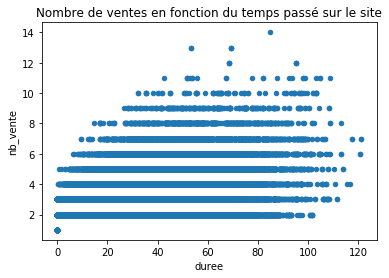

In [86]:
plt.figure(figsize=(12,6))
df_achat_minute.plot(kind='scatter', x='duree',y='nb_vente')
plt.title('Nombre de ventes en fonction du temps passé sur le site')
plt.show()

* Calcul du coefficient de pearson et la covariance

In [87]:
print(st.pearsonr(df_achat_minute['duree'], df_achat_minute['nb_vente'])[0])
print(np.cov(df_achat_minute['duree'], df_achat_minute['nb_vente'], ddof=0)[1,0])

0.7547495177728917
17.531803695301818


Le coefficient de correlation est 0.75. Il ya une correlation linéaire entre la durée et le nombre de ventes. 

####  La regression linéeaire 

In [88]:
import statsmodels.api as sm

Y = df_achat_minute['nb_vente'] # premier argument
X = df_achat_minute[['duree']] # deuxième argument
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['duree'],result.params['intercept']

In [89]:
a,b = result.params['duree'],result.params['intercept']
a,b

(0.052604110697849996, 1.2674173762603287)

* Visualisation 

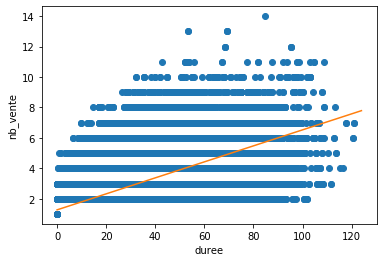

In [90]:
plt.plot(df_achat_minute.duree,df_achat_minute.nb_vente, "o")
plt.plot(np.arange(125),[a*x+b for x in np.arange(125)])
plt.xlabel("duree")
plt.ylabel("nb_vente")
plt.show()

La droite de regression est de la forme: **y = 0.052604110697849996 x +  1.2674173762603287**

**Conclusion**:Il existe une corrélation linéaire positive entre la durée de sessions et le nombre de ventes. Plus la durée de session augmente plus le nombre de ventes augmente. 

### La fréquence d'achat  

La fréquence d’achat et le taux de clients récurrents/d’achats répétés se calculent de façon comparable. Il vous suffit de sélectionner la même période d’analyse définie pour le calcul du taux de clients récurrents, et de diviser le nombre total de commandes par le nombre de clients uniques.

**Fréquence d’achat = Nombre total de commandes / Nombre de clients uniques**

#### Le nombre total de commandes

In [91]:
nb_total_command_mois = transaction_df[['year','month','session_id']].groupby(['year','month']).count().reset_index()

In [92]:
nb_total_command_mois

,year,month,session_id
0,2021,3,28610
1,2021,4,28457
2,2021,5,28293
3,2021,6,26857
4,2021,7,24742
5,2021,8,25659
6,2021,9,33326
7,2021,10,21606
8,2021,11,28321
9,2021,12,32464


#### Le nombre de clients uniques par mois

In [93]:
nb_client_mois = transaction_df[['year','month','client_id']].groupby(['year','month']).nunique()['client_id'].reset_index()

In [94]:
nb_client_mois

,year,month,client_id
0,2021,3,5676
1,2021,4,5674
2,2021,5,5644
3,2021,6,5659
4,2021,7,5672
5,2021,8,5642
6,2021,9,5693
7,2021,10,5094
8,2021,11,5875
9,2021,12,5867


* Jointure des dataframes

In [95]:
data_client = nb_total_command_mois.merge(nb_client_mois)

In [96]:
data_client

,year,month,session_id,client_id
0,2021,3,28610,5676
1,2021,4,28457,5674
2,2021,5,28293,5644
3,2021,6,26857,5659
4,2021,7,24742,5672
5,2021,8,25659,5642
6,2021,9,33326,5693
7,2021,10,21606,5094
8,2021,11,28321,5875
9,2021,12,32464,5867


In [97]:
data_client['frequence_achat'] = data_client['session_id'] / data_client['client_id']

In [98]:
data_client['frequence_achat']

0     5.040521
1     5.015333
2     5.012934
3     4.745892
4     4.362130
5     4.547855
6     5.853856
7     4.241461
8     4.820596
9     5.533322
10    5.052160
11    5.167569
12    5.091174
13    4.849166
14    5.131052
15    4.987056
16    4.963142
17    4.918519
18    4.934646
19    5.034579
20    4.970256
21    4.964447
22    4.966541
23    4.572656
Name: frequence_achat, dtype: float64

In [99]:
data_client

,year,month,session_id,client_id,frequence_achat
0,2021,3,28610,5676,5.040521
1,2021,4,28457,5674,5.015333
2,2021,5,28293,5644,5.012934
3,2021,6,26857,5659,4.745892
4,2021,7,24742,5672,4.362130
5,2021,8,25659,5642,4.547855
6,2021,9,33326,5693,5.853856
7,2021,10,21606,5094,4.241461
8,2021,11,28321,5875,4.820596
9,2021,12,32464,5867,5.533322


In [100]:
data_client.describe()

,year,month,session_id,client_id,frequence_achat
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2021.666667,6.500000,28305.500000,5713.916667,4.949036
std,0.637022,3.526299,2342.529384,153.378451,0.330693
min,2021.000000,1.000000,21606.000000,5094.000000,4.241461
25%,2021.000000,3.750000,28123.750000,5673.500000,4.842023
50%,2022.000000,6.500000,28563.000000,5733.500000,4.968398
75%,2022.000000,9.250000,29067.500000,5806.000000,5.043431
max,2023.000000,12.000000,33326.000000,5875.000000,5.853856


**Conclusion:** En moyenne, les clients effectuent **5 commandes par mois**.

### Etude des correlations

In [101]:
transaction_df.corr()

,price,categ,birth,age,year,month
price,1.000000,0.671767,0.209439,-0.209439,0.014198,-0.012301
categ,0.671767,1.000000,0.099222,-0.099222,0.033494,-0.019239
birth,0.209439,0.099222,1.000000,-1.000000,-0.002629,-0.002310
age,-0.209439,-0.099222,-1.000000,1.000000,0.002629,0.002310
year,0.014198,0.033494,-0.002629,0.002629,1.000000,-0.384767
month,-0.012301,-0.019239,-0.002310,0.002310,-0.384767,1.000000


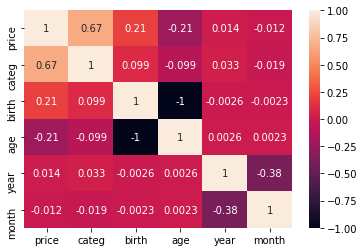

In [102]:
sns.heatmap(transaction_df.corr(), annot=True)

**Conclusion:** Il esixte une correlation positive entre la catégorie et le prix des produits

### Le lien entre le genre d’un client et les catégories des livres achetés

In [103]:
X='sex'
Y='categ'

cont = transaction_df[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


- **Les effectifs observés de Sex f** sont  de 206 220 (categ 0.0), 114 899 (categ 1.0)et 17 283 (categ 2.0) et **sa distribution conditionnelle obervée** est de 338 402.
- **Les effectifs observés de Sex m** effectifs sont de 209 460 (categ 0.0), 112 270 (categ 1.0) et 19 200 (categ 2.0) et **sa distribution conditionnelle obervée** est de 340 930 

* Visualisation du tableau de contingence

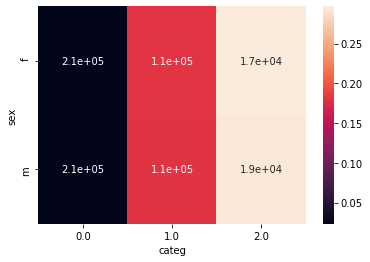

In [104]:
tx = cont.loc[:,['Total']]
ty = cont.loc[['Total'],:]
n = len(transaction_df)
indep = tx.dot(ty) / n
c = cont.fillna(0)
measure = (c-indep)**2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n
sns.heatmap(table.iloc[:-1,:-1], annot=c.iloc[:-1,:-1])
plt.show()

**Conclusion**: Les produits des categ 0.0 et 1.0 sont achetés par les clients de tout genre. Les produits de catégorie 2.0 par contre sont plus achetés par les clients de sex masculin.

### Le test de Chi-2 

Nous avons deux variables qualitatives:

- **le sexe d'un client** (2 modalités): m et f
- **les categoeries des livres** (3 modalités): 0.0;1.0 et 2.0

Le test de khi2 s'applique à partir du tableau de contingence qui permet de croiser les modalités des deux variables qualitatives. 

**soit l'hypothèse H0: Le genre des clients depend des catégories de livres achetés.**

* Calcul des effectifs observés

In [105]:
obs = cont
obs

categ,0.0,1.0,2.0,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


* La population 

In [106]:
n = len(transaction_df)
n

679332

* Calcul des effectifs attendus 

In [107]:
indep = tx.dot(ty) / len(transaction_df)

In [108]:
indep

categ,0.0,1.0,2.0,Total
sex,,,,
f,207066.564449,113161.817694,18173.617857,338402.0
m,208613.435551,114007.182306,18309.382143,340930.0
Total,415680.000000,227169.000000,36483.000000,679332.0


* Calcul de la mesure des écarts

In [109]:
measure = (cont-indep)**2 / indep
measure

categ,0.0,1.0,2.0,Total
sex,,,,
f,3.461068,26.668027,43.645694,0.0
m,3.435404,26.470283,43.322061,0.0
Total,0.000000,0.000000,0.000000,0.0


* Calcu de la statistique du khi2 

In [110]:
chi_square_stat = measure.sum().sum()
print(f"Le chi2 statistique est de:")
chi_square_stat

Le chi2 statistique est de:


147.00253568681114

* Calcul des fréquences attendus 

In [111]:
table = measure /chi_square_stat
table

categ,0.0,1.0,2.0,Total
sex,,,,
f,0.023544,0.181412,0.296904,0.0
m,0.023370,0.180067,0.294703,0.0
Total,0.000000,0.000000,0.000000,0.0


* Le seuil critique 

In [112]:
from scipy.stats import chi2
crit = st.chi2.ppf(q = 0.95, # valeur critique de 95% de confiance
                df = 2) # DF = (2-1)*(3-1) = 2)
print('critical value')
print(crit)

p_value = 1-st.chi2.cdf(x = chi_square_stat, #find the p_value
                       df = 2)
print('p_value')
print(p_value)

critical value
5.991464547107979
p_value
0.0


####  Autre méthode de calcul du chi2 avec **Scipy**

In [113]:
df1 = transaction_df['categ']
df2 = transaction_df['sex']

In [114]:
tab_cont = pd.crosstab(df2,df1)
tab_cont

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [115]:
from scipy.stats import chi2_contingency

chi2, p_value, df, indep = chi2_contingency(tab_cont)
chi2, p_value, df, indep

(147.00253568681114,
 1.1989607410166063e-32,
 2,
 array([[207066.56444861, 113161.81769444,  18173.61785695],
        [208613.43555139, 114007.18230556,  18309.38214305]]))

- La ligne 1 est la valeur du chi2 = 147.0025, 
- La ligne 2 celle de la p_value=1.1989607410166063e-32. On parle de **significativité** si la valeur de la pvalue est inférieur à 0.05 
- La ligne 3 est le degré de liberté df = 2. 
- La ligne 4 correspond au valeurs attendues.  

**Conclusion:** Le chi2 statistique est supérieure à la valeur critique donc l'hypothèse H0 est rejetée.Il exite un indépendance significative entre les deux variables.

### Repartition des catégories des produits en fonction l'age des clients

In [116]:
transaction_df.head()

,id_prod,session_id,client_id,price,categ,sex,birth,age,year,month
date,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,f,1967,54,2021,3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,m,1960,61,2021,3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,m,1988,33,2021,3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,f,1989,32,2021,3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,f,1956,65,2021,3


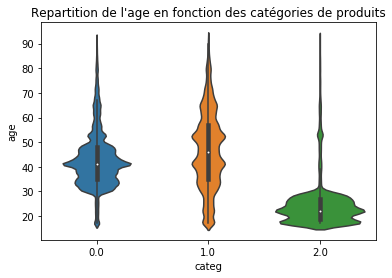

In [117]:
sns.violinplot(x='categ', y='age', data=transaction_df, figsize=(12,6))
plt.title('Repartition de l\'age en fonction des catégories de produits')
plt.show()

- La repartition de l'age est homogène chez les clients de catégorie 1.0.
- Les produits de catégorie 0.0 sont achétés par plupart des clients qui ont l'age compris entre 35 et 45 ans. 
- Les produits de catégorie 1.0 sont achétés les clients qui ont l'age compris entre 35 et 55 ans.
- Les produits de catégorie 2.0 sont achetés par les clients qui ont l'age compris entre 17 et 25 ans.

### Test d'ANOVA 

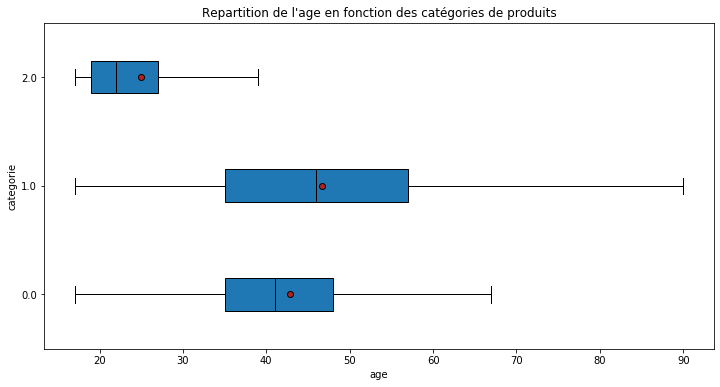

In [118]:
X = "categ" # qualitative
Y = "age" # quantitative

modalites = transaction_df[X].unique()
groupes = []
for m in modalites:
    groupes.append(transaction_df[transaction_df[X]==m][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
         'markerfacecolor':'firebrick'}
plt.figure(figsize=(12,6))
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Repartition de l\'age en fonction des catégories de produits')
plt.xlabel('age')
plt.ylabel('categorie')
plt.show()

Les points rouge representent la moyenne des valeurs.

In [119]:
X = "categ" # qualitative
Y = "age" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean() #calcul de la moyenne de tous les ages
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe] 
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y]) # calcul de la variation totale
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # calcul de la varitation interclasse
    return SCE/SCT
    
eta_squared(transaction_df[X],transaction_df[Y])

0.11900916927611803

**Conclusion**: eta_squared > 0 donc Il existe une correlation entre l'âge des clients et les catégories de produits. 

### Repartiton des prix en fonction de l'age des clients 

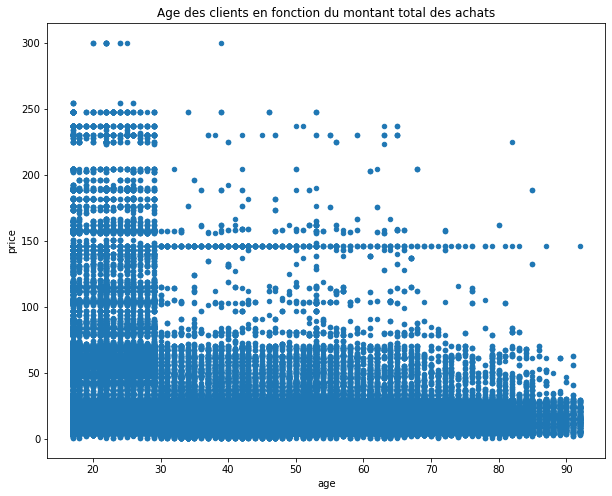

In [120]:
transaction_df.plot(kind='scatter', x='age', y='price', figsize=(10,8))
plt.title('Age des clients en fonction du montant total des achats')
plt.show()

Les prix compris entre 0 et 25 EURO sont repartis à tous les clients de tout age. Les clients ayant l'âge compris entre 17 et 30 ans ont un pouvoir d'achat plus élévé que les autres. 

* Calcul du coefficient de correlation de Pearson

In [121]:
print(st.pearsonr(transaction_df['age'], transaction_df['price'])[0])
print(np.cov(transaction_df['age'], transaction_df['price'], ddof=0)[1,0])

-0.20943870186601704
-52.10263370239436


Il n'ya pas de correlation linéaire entre l'age et le prix des produits

In [122]:
CA_age = transaction_df[['age','price']].groupby(['age']).sum().reset_index()
CA_age.head()

,age,price
0,17,609013.690000
1,18,178195.780000
2,19,184209.264989
3,20,178497.700000
4,21,165029.256659


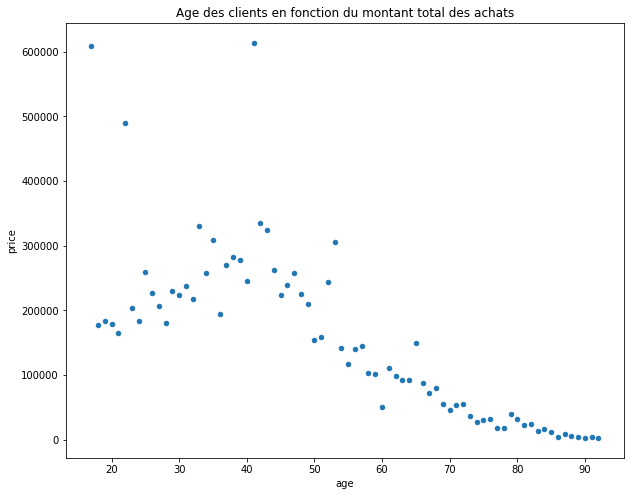

In [123]:
CA_age.plot(kind='scatter', x='age', y='price', figsize=(10,8))
plt.title('Age des clients en fonction du montant total des achats')
plt.show()

In [124]:
print(st.pearsonr(CA_age['age'], CA_age['price'])[0])
print(np.cov(CA_age['age'], CA_age['price'], ddof=0)[1,0])

-0.7788603103339341
-2230273.131777334


Il ya une corrélation polynomiale entre l'âge et le CA. On a une parabole avec un sommet à 40 ans. Entre 17 et 40 le CA augmente. Les clients de autour de 40 ans participent plus au CA. Les clients qui ont 40 ans ont un CA faible. 

###  La regression linéeaire 

In [125]:
import statsmodels.api as sm

Y = CA_age['price'] # premier argument
X = CA_age[['age']] # deuxième argument
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']


In [126]:
a,b = result.params['age'],result.params['intercept']
a,b

(-4634.333780316537, 408572.24038069416)

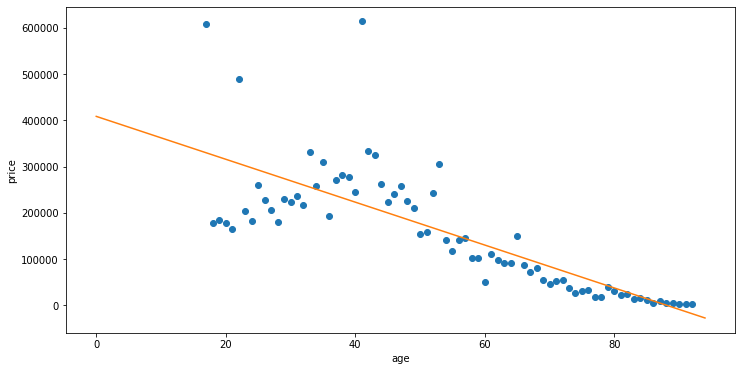

In [127]:
plt.figure(figsize=(12,6))
plt.plot(CA_age.age,CA_age.price, "o")
plt.plot(np.arange(95),[a*x+b for x in np.arange(95)])
plt.xlabel("age")
plt.ylabel("price")
plt.show()

l'équation de la droite est de la forme **y = -4634.333780316537x + 408572.24038069416**. Donc il ya un lien entre l'age des clients et le CA. Le coefficient de regression est négative.

**Conclusion**: Les clients qui ont un age autour de 40 ans participe plus au CA.